<a href="https://colab.research.google.com/github/Barbosa6Andre/CustomerSegmentation_WineRetail/blob/main/CustomerSegmentation_WineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation and Marketing Analysis

## 0. Preparation of the Enviroment
To begin this project we will
* Import required libraries
* Load all data that we will be working with
* Organize initial data structure

In [ ]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn.preprocessing as pp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data into colab enviroment
url = 'https://raw.githubusercontent.com/Barbosa6Andre/CustomerSegmentation_WineRetail/refs/heads/main/marketing_campaign.csv'
df = pd.read_csv(url, sep = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
columns = df.columns.tolist()

# Sum up all expense columns to create a new 'Total expenses' column
expense_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total expenses'] = df[expense_columns].sum(axis=1)
columns.append('Total expenses')

goldindex = columns.index('MntGoldProds') + 1

# Insert 'Total expenses' right after 'MntGoldProds'
columns.insert(goldindex, columns.pop(columns.index('Total expenses')))

print(f'The Total expenses column has been added.')

df= df[columns]

print(df.columns)

The Total expenses column has been added.
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total expenses', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


In [ ]:
#organize 'AccceptedCmp' columns

#identify starting point for 'AccceptedCmp' columns
start_cmp_index = columns.index('AcceptedCmp1') +1

#set order for the other 'AccceptedCmp' columns
cmp_columns = ['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

#insert each 'AcceptedCmpX' right after 'AcceptedCmp1' in the desired order
for i, cmp in enumerate(cmp_columns):
    counter = 0
    if cmp in columns:  # Check if the column is in the DataFrame to avoid errors
        columns.remove(cmp)
        columns.insert(start_cmp_index + counter, cmp)
        counter += 1

print('The AcceptedCmp columns have been reorganized.')

# Reassign the reordered columns back to the DataFrame
df = df[columns]

# Verify the new order of columns
print(df.columns)

The AcceptedCmp columns have been reorganized.
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total expenses', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


## 1. Data Cleaning

This next segment will be focused on cleaning the data we organized before. It will include the following:
* Handling missing data (Na values)
* Handling any duplicates
* Correcting data types
* Handling outliers

In [ ]:
#basic info of the dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Total expenses       2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#identify missing values
missings = df.isnull().sum()
print(f'There are {df.isnull().sum().sum()} missing values in the dataframe')
missings

There are 24 missing values in the dataframe


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
#identify missing values and treat them. Considering the low number of Na values I chose to drop.
already_dropped = 0
while already_dropped == 0:
    n_nulls = df.isnull().sum().sum()
    print(f"{already_dropped} rows have been dropped")
    new_total = df.shape[0] - n_nulls
    already_dropped = 1

print(f'The dataframe has now a total of {new_total} rows. A total of {(new_total/2240)*100: .2f}% of the original dataframe')
df.dropna(inplace=True)

0 rows have been dropped
The dataframe has now a total of 2216 rows. A total of  98.93% of the original dataframe


In [ ]:
#Checked to see if there were duplicated rows and none were found.
n_duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {n_duplicates}')

Total duplicate rows: 0


After analysing the columns of the dataframe I came to the conclusion that the following columns were not beneficial to the dataframe: ['ID', 'Complain', 'Z_CostContact', 'Z_Revenue']. ID because it had no duplicates and since we will not be identifying individual customers the column would not be needed anymore. Complain because there were only 21 customers who had complained in the last 2 years, so it would not contribute much to the analysis. Z_CostContact and Z_Revenue had no consistent data so they wouldn't be reliable for any insights.

Said columns are dropped in the cell below.

In [ ]:
# Identifying and dropping irrelevant columns
irrelevant_cols = ['ID', 'Complain', 'Z_CostContact', 'Z_Revenue']

# Check each column individually and drop if present
dropped_columns = []
for col in irrelevant_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)  # Drop the column in the df
        dropped_columns.append(col)

# Remove the dropped columns from the list of columns
    if col in columns:
        columns.remove(col)

# Print out the status of dropped columns
if dropped_columns:
    print(f"The {', '.join(dropped_columns)} have been dropped")
else:
    print(f'The {irrelevant_cols} columns have already been dropped')

df

The ID, Complain, Z_CostContact, Z_Revenue have been dropped


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,9,3,4,5,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,8,2,5,7,1,0,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,2,3,13,6,0,0,0,1,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,6,5,10,3,0,0,0,0,0,0


After consideration I found that the Year Birth column would be of more use if if showed the customer's age instead of year of birth. Because of that I replaced it with their respective age. I considered the year of the data as 2014 since the last known entry was identified as 2014. If I did need their year of birth again later on I could just reverse these steps again.

* Treat values that could be equivalent to others:
Columns - Education and Marital_Status

In [ ]:
#Substitute the year of birth column with the age

# Ensure 'columns' is correctly defined as a list of DataFrame column names
columns = df.columns.tolist()

# Replace 'Year_Birth' column with a new 'Age' column
if 'Year_Birth' in columns:
    # Calculate 'Age' from 'Year_Birth'
    df['Age'] = 2014 - df['Year_Birth']  # Assuming the last known year of customer addition is 2014

    # Get the index of 'Year_Birth' to replace it in the columns list
    year_birth_index = columns.index('Year_Birth')

    # Replace 'Year_Birth' in the columns list with 'Age'
    columns[year_birth_index] = 'Age'

    # Reorder DataFrame columns based on the new list, which includes 'Age' where 'Year_Birth' was
    df = df[columns]

    print(f'The Year_Birth column has been successfully replaced with the Age column.\n Updated columns list: {columns}\n {df.head()}')
else:
    print(f'The Year_Birth column has already been replaced with the Age column.\n {df.head()}')


The Year_Birth column has been successfully replaced with the Age column.
 Updated columns list: ['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total expenses', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
    Age   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0   57  Graduation         Single  58138.0        0         0  04-09-2012   
1   60  Graduation         Single  46344.0        1         1  08-03-2014   
2   49  Graduation       Together  71613.0        0         0  21-08-2013   
3   30  Graduation       Together  26646.0        1         0  10-02-2014   
4   33         PhD        Married  58293.0        1         0  19-01-2014   

   Recency  MntWines  MntFr

In [ ]:
#count categorical values for education
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [ ]:
#fix any inconsistent data for education
#I considered 2n Cycle to be the same as Master level and switched 'graduation' level to 'bachelor' so it is more clear what kind of graduation the person has.
df['Education'].replace({'Graduation' : 'Bachelor', '2n Cycle' : 'Master', 'Basic' : 'High School'}, inplace=True)
print('The Education column values have been updated.')
df['Education'].value_counts()

The Education column values have been updated.


,count
Education,
Bachelor,1116
Master,565
PhD,481
High School,54


The graph below represents the distribution of the different educational levels of the customer base.
It is possible to afirm that the store focuses on clients with a higher level of education. 
This can be reflected by higher prices of products or complexity of products/services. 
The store location could also be in a more developed neighborhood that would reflect higher prices.


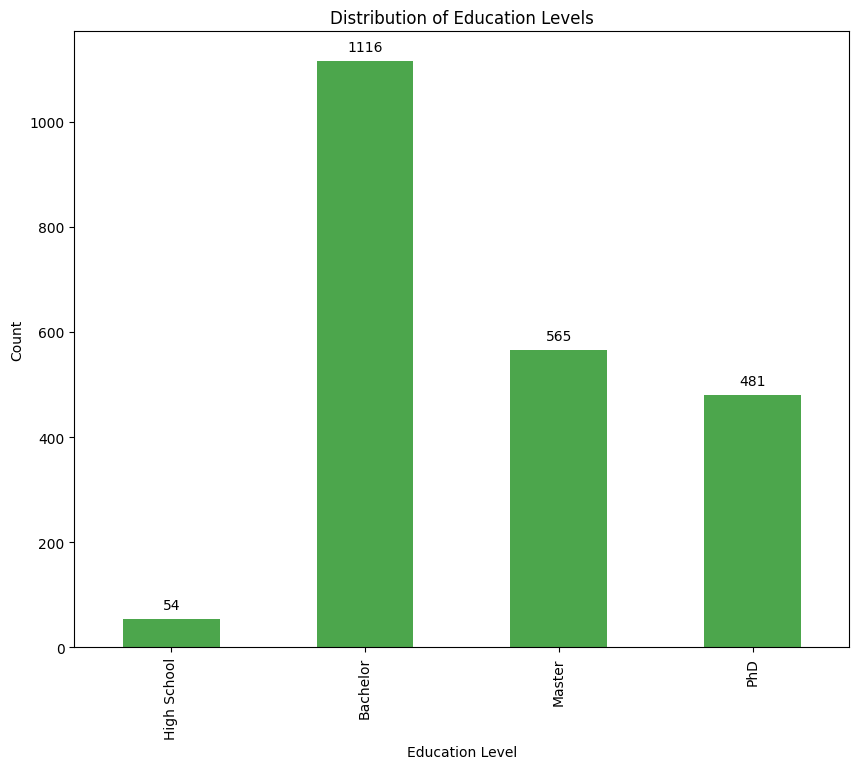

In [ ]:
education_order = ['High School', 'Bachelor', 'Master', 'PhD']

plt.figure(figsize=(10, 8))
educationplt = df['Education'].value_counts()[education_order].plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

for p in educationplt.patches:
    educationplt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

print('The graph below represents the distribution of the different educational levels of the customer base.\nIt is possible to afirm that the store focuses on clients with a higher level of education. \nThis can be reflected by higher prices of products or complexity of products/services. \nThe store location could also be in a more developed neighborhood that would reflect higher prices.')
plt.show()

In [ ]:
#Treat 'Marital_status' Column
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [ ]:
#fix any inconsistent data for marital status
#I considered the 'yolo', 'alone', and 'absurd' as single
df['Marital_Status'].replace(['YOLO','Alone','Absurd'],'Single', inplace=True)
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,478
Divorced,232
Widow,76


After cleaning the data it is possible to better visualize the distribution of the different marital statuses of the customer base.
It is possible to observe that the customers are distributed through all "chronological" steps of the different marital statuses


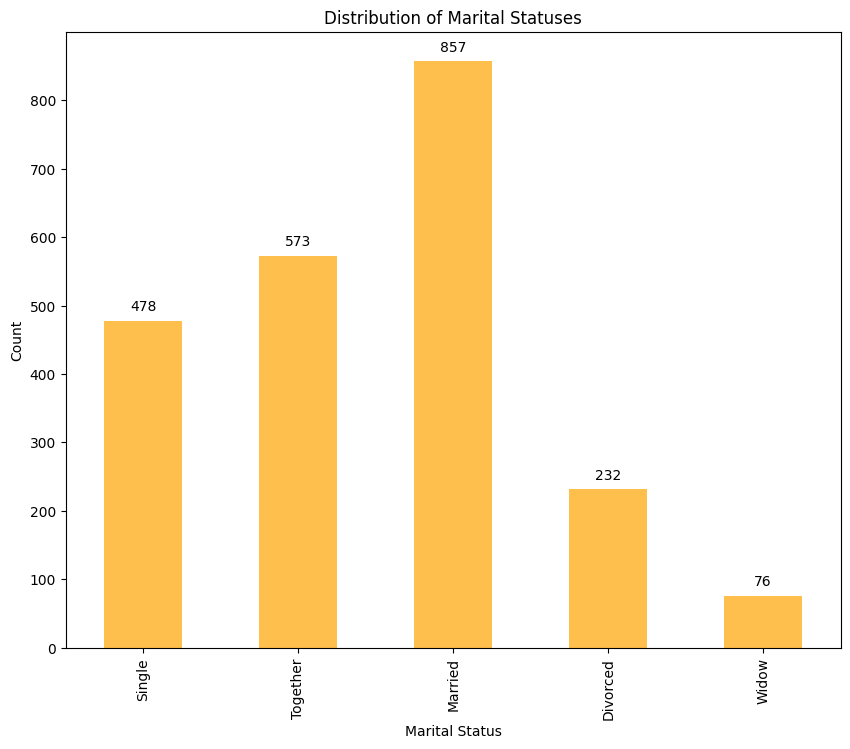

In [ ]:
marital_order = ['Single', 'Together', 'Married', 'Divorced', 'Widow']

plt.figure(figsize=(10, 8))
maritalplt = df['Marital_Status'].value_counts()[marital_order].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Distribution of Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Count')

#include total amount of ocurrences on each column
for p in maritalplt.patches:
    maritalplt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

print('After cleaning the data it is possible to better visualize the distribution of the different marital statuses of the customer base.\nIt is possible to observe that the customers are distributed through all "chronological" steps of the different marital statuses')
plt.show()

Convert data types:

In [ ]:
#convert Dt_customer to datetime instead of object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Dt_Customer']

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
...,...
2235,2013-06-13
2236,2014-06-10
2237,2014-01-25
2238,2014-01-24


### Identify any outliers that may be unreasonable. Considering the columns of the data frame the possible ones that could have any problems are income and year of birth.

In [ ]:
#Checking for details for both said columns
df[['Age','Income']].describe()

,Age,Income
count,2216.000000,2216.000000
mean,45.179603,52247.251354
std,11.985554,25173.076661
min,18.000000,1730.000000
25%,37.000000,35303.000000
50%,44.000000,51381.500000
75%,55.000000,68522.000000
max,121.000000,666666.000000


In [ ]:
# Function to identify outliers using the IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column]

# Identify outliers for 'Age' and 'Income'
age_outliers = find_outliers(df, 'Age')
income_outliers = find_outliers(df, 'Income')

# Display outliers
print(f"Age:\nIndex Outliers:\n{age_outliers}")

print(f"\nIncome:\nIndex Outliers:\n{income_outliers}")

Age:
Index Outliers:
192    114
239    121
339    115
Name: Age, dtype: int64

Income:
Index Outliers:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


I chose to only consider ages under 110 years old since above that would be irrealistic ages to consider for any analysis. I then proceeded to drop the outliers who passed that threshold.

In [ ]:
#Establishing a limit of age of 110. This removes any outliers that would not be correctly inputed.
age_to_be_dropped = df[df['Age'] > 110].index
print(age_to_be_dropped)
df.drop(age_to_be_dropped, inplace = True)

print(f'Number of rows dropped: {len(age_to_be_dropped)}')
print(f'New total number of rows: {len(df)}')

Index([192, 239, 339], dtype='int64')
Number of rows dropped: 3
New total number of rows: 2213


The store has a clientele from 18 to 74 year olds, the Q1 being 37 years, Q3 55 years and a mean of 44 year olds.


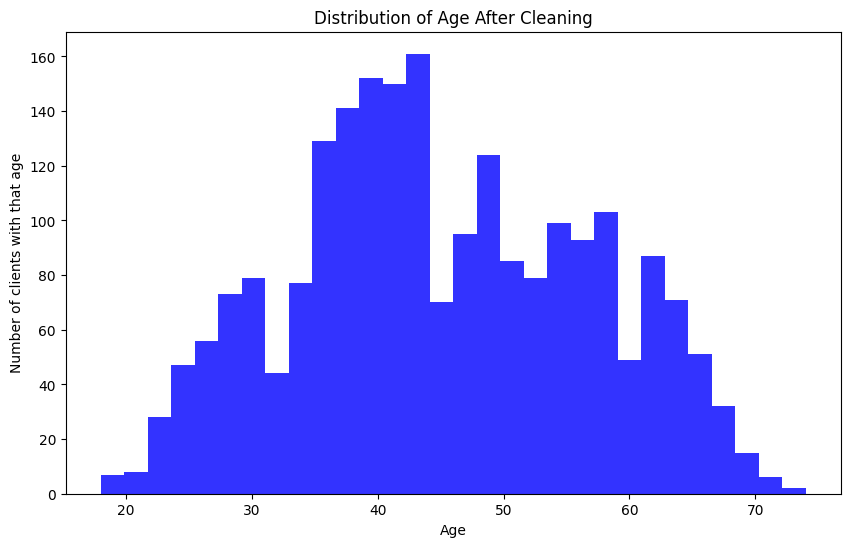

In [ ]:
# Visualize age distribution after cleaning
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='blue', alpha=0.8)
plt.title('Distribution of Age After Cleaning')
plt.xlabel('Age')
plt.ylabel('Number of clients with that age')
print('The store has a clientele from 18 to 74 year olds, the Q1 being 37 years, Q3 55 years and a mean of 44 year olds.')
plt.show()

Regarding the income data I chose to consider only customer who earned under 140.000. There were 9 outliers, 1 of them being above 660.000 (which would not be reasonable) and the other 8 would heavily weighten any future statistical analysis so I chose to also remove the other outliers. They could be considered oportunities to be explored in the future by the store, but i chose to keep them out of this analysis.

In [ ]:
# Drop customers with 'Income' greater than 140,000
income_dropped = df[df['Income'] > 140000].index
df.drop(df[df['Income'] > 140000].index, inplace=True)
print(f'The incomes above U$140.000 have been dropped')
print(f'Numbers of rows dropped: {len(income_dropped)}')
print(f'New total number of rows: {len(df)}')


The incomes above U$140.000 have been dropped
Numbers of rows dropped: 0
New total number of rows: 2205


Most of the customers of the store fit into the income distribution between $17.300 and just above $100.000 anualy. 
There are a number of outliers around 150.000 (8 customers), however I chose to focus on the quality of the data 
and dropped those outliers as well. They were not single outliers and could be oportunities to be explored by the business, 
but I chose to not take them into consideration during the analysis since they would heavily weighten some of the statistical values


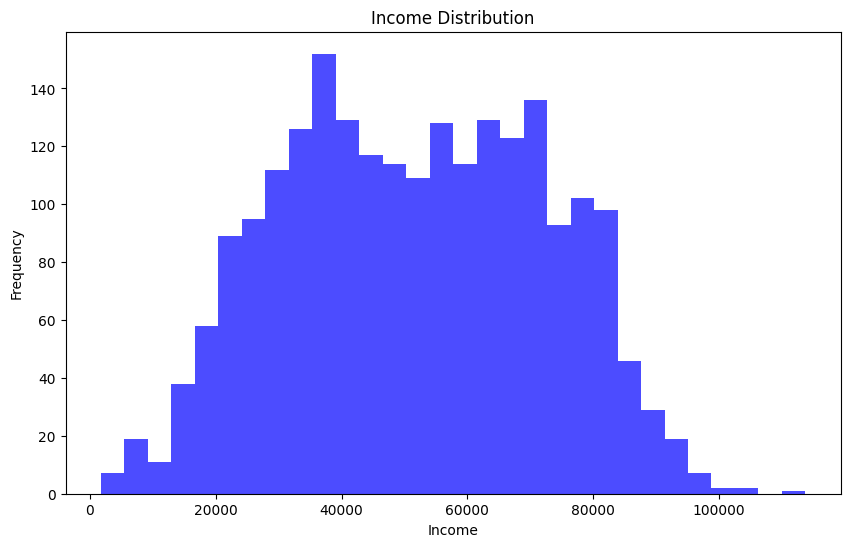

In [ ]:
#Creating a histogram with all income levels of the customers
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=30, color='blue', alpha=0.7)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
print('Most of the customers of the store fit into the income distribution between $17.300 and just above $100.000 anualy. \nThere are a number of outliers around 150.000 (8 customers), however I chose to focus on the quality of the data \nand dropped those outliers as well. They were not single outliers and could be oportunities to be explored by the business, \nbut I chose to not take them into consideration during the analysis since they would heavily weighten some of the statistical values')
plt.show()

## 2.Exploratory data analysis
* Explore data and look for insights

### Analysing income x total expenses in relation to kid/teen at home.
One of the first things I thought to look up was the relationship between income and total expenses.

It is possible to see that the total expenses of the customers increases after 50.000 or so.


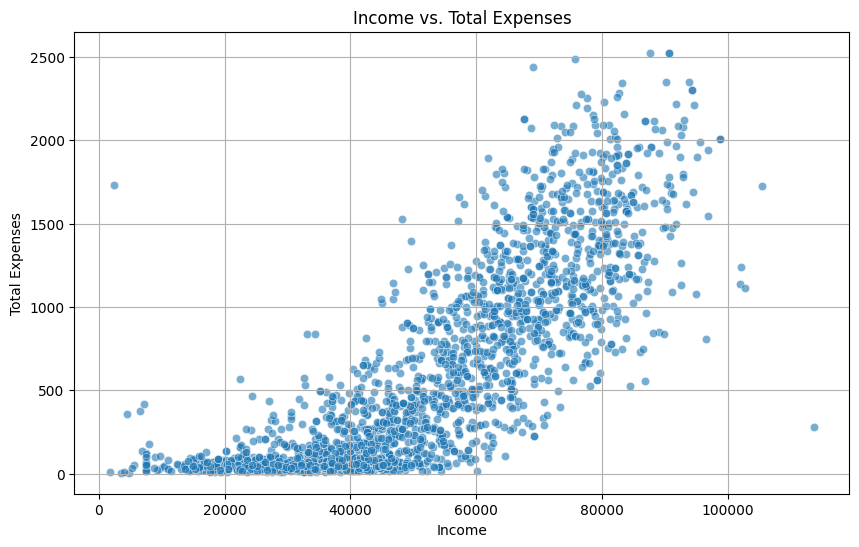

In [ ]:
# Scatter Plot: Income vs. Total Expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total expenses', alpha=0.6)
plt.title('Income vs. Total Expenses')
plt.xlabel('Income')
plt.ylabel('Total Expenses')
plt.grid(True)
print('It is possible to see that the total expenses of the customers increases after 50.000 or so.')
plt.show()

It is possible to see the the total expense of families with kids at home highly decreases in relation to the number of kids at home.


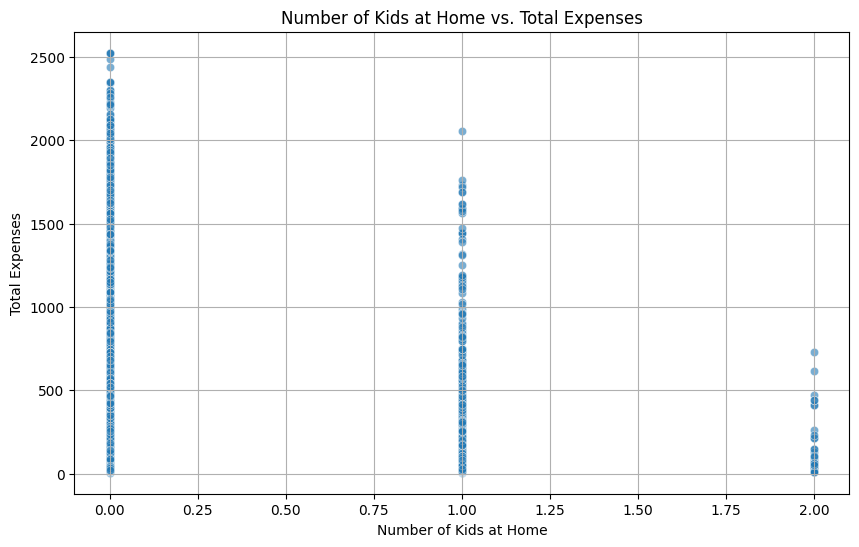

In [ ]:
# Scatter Plot: Kidhome vs. Total Expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kidhome', y='Total expenses', alpha=0.6)
plt.title('Number of Kids at Home vs. Total Expenses')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Total Expenses')
plt.grid(True)
print('It is possible to see the the total expense of families with kids at home highly decreases in relation to the number of kids at home.')
plt.show()

It is possible to see that customers with no kids at home are more likely to spend more than customers with kids at home. 
 The fact of being 1 or 2 kids does not seem to make that much of a difference in the spending habbits, just the fact that the customer has a kid.
This can also be explained as these customers have to better control their expenses and this store is seen as a non-essential product store.


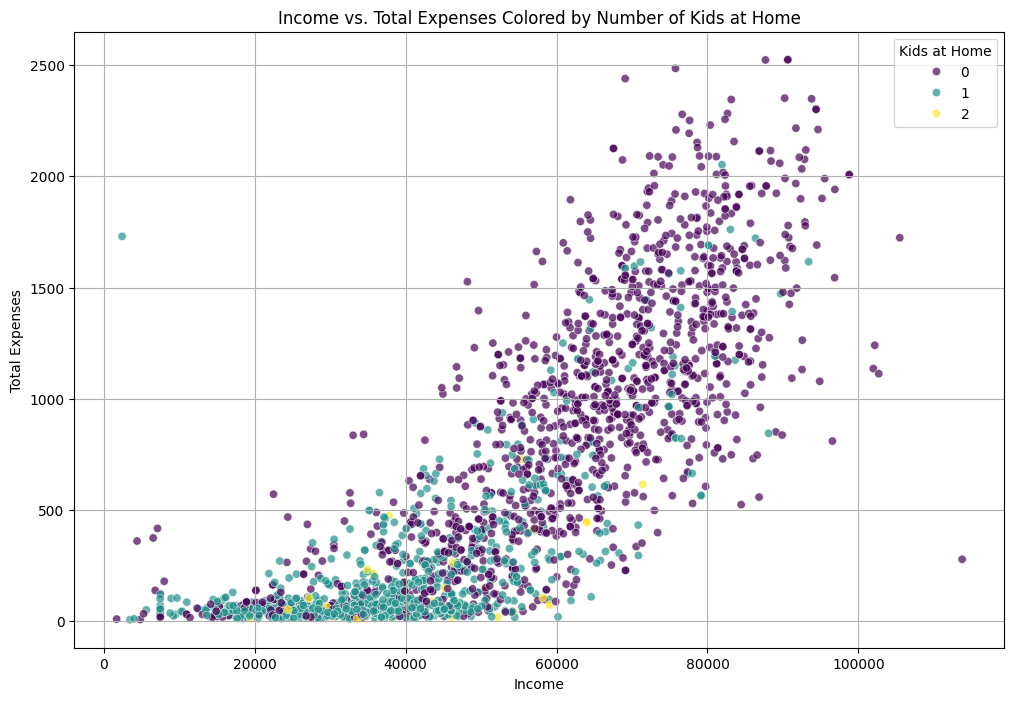

In [ ]:
# Income vs. Expenses colored by presence of Kids at Home
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='Total expenses', hue='Kidhome', palette='viridis', alpha=0.7)
plt.title('Income vs. Total Expenses Colored by Number of Kids at Home')
plt.xlabel('Income')
plt.ylabel('Total Expenses')
plt.legend(title='Kids at Home')
plt.grid(True)
print('It is possible to see that customers with no kids at home are more likely to spend more than customers with kids at home. \n The fact of being 1 or 2 kids does not seem to make that much of a difference in the spending habbits, just the fact that the customer has a kid.\nThis can also be explained as these customers have to better control their expenses and this store is seen as a non-essential product store.')
plt.show()


It is possible to see that the teen at home behaviour is different from the kids at home. 
Customers with teens in their families have a higher total spending at stores than families with smaller kids.


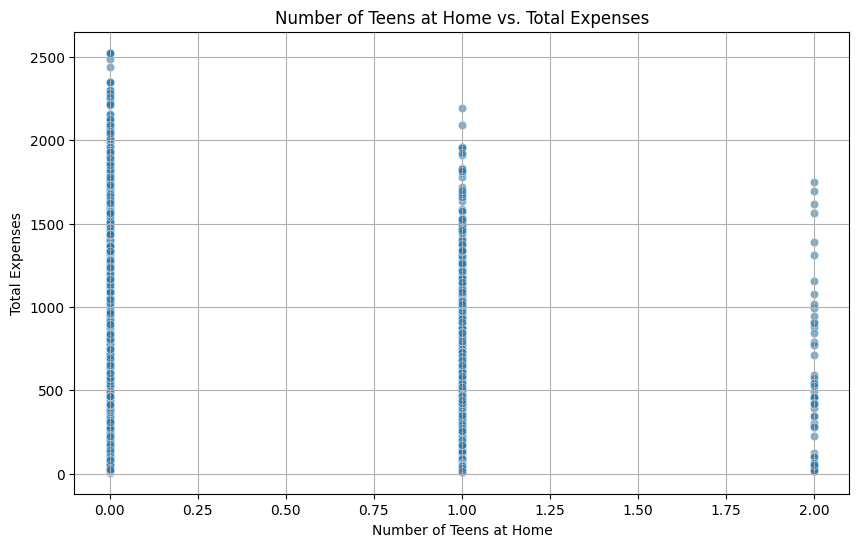

In [ ]:
# Scatter Plot: Teenhome vs. Total Expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Teenhome', y='Total expenses', alpha=0.6)
plt.title('Number of Teens at Home vs. Total Expenses')
plt.xlabel('Number of Teens at Home')
plt.ylabel('Total Expenses')
plt.grid(True)
print('It is possible to see that the teen at home behaviour is different from the kids at home. \nCustomers with teens in their families have a higher total spending at stores than families with smaller kids.')
plt.show()

It is possible to see that the patter seen with the kids at home is not seen when analysing teens at home behaviour. 
The most likely situation is that teens have a less costs associated then kids do. And because of that their parents can spend more money on non-essential products.
It could be expeculated that the teens see the products this store sells as of a higher status and try to achieve that by making their parents buy these items.
The number of families with 2 or more teens at home seem to coroborate that theory but there is not enough data to back that up


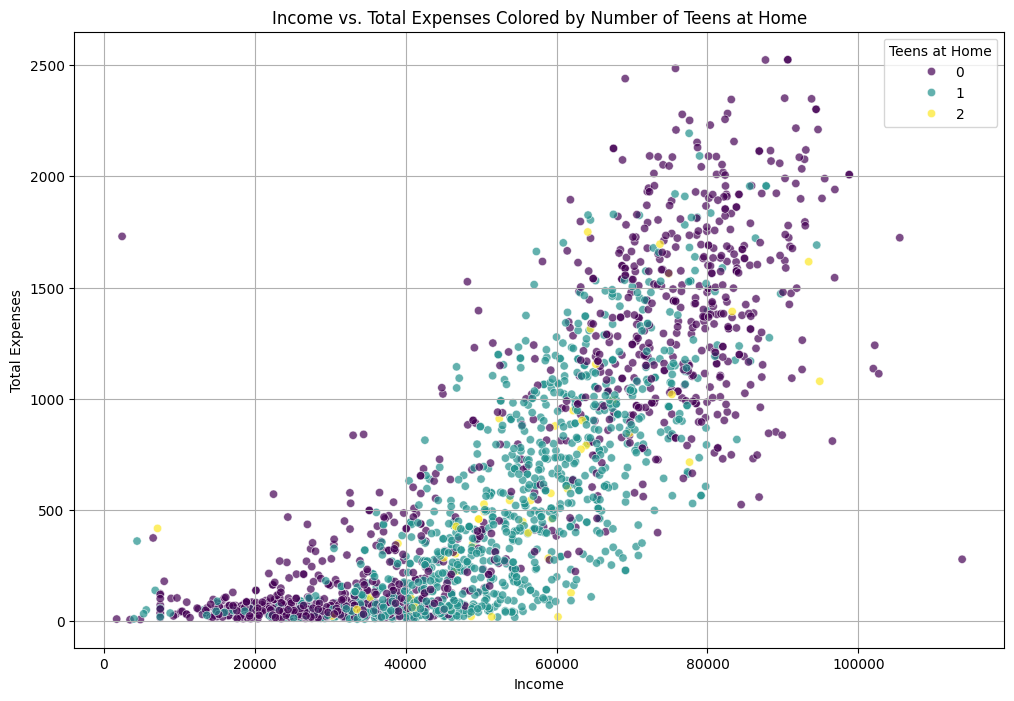

In [ ]:
# Income vs. Expenses colored by presence of Kids at Home
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='Total expenses', hue='Teenhome', palette='viridis', alpha=0.7)
plt.title('Income vs. Total Expenses Colored by Number of Teens at Home')
plt.xlabel('Income')
plt.ylabel('Total Expenses')
plt.legend(title='Teens at Home')
plt.grid(True)
print('It is possible to see that the patter seen with the kids at home is not seen when analysing teens at home behaviour. \nThe most likely situation is that teens have a less costs associated then kids do. And because of that their parents can spend more money on non-essential products.\nIt could be expeculated that the teens see the products this store sells as of a higher status and try to achieve that by making their parents buy these items.\nThe number of families with 2 or more teens at home seem to coroborate that theory but there is not enough data to back that up')
plt.show()

### Analysing product importance to *sales*

In [ ]:
product_sales = {
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meat Products': df['MntMeatProducts'].sum(),
    'Fish Products': df['MntFishProducts'].sum(),
    'Sweet Products': df['MntSweetProducts'].sum(),
    'Gold Products': df['MntGoldProds'].sum()
}

# Total expenses might already be calculated as a sum of all product expenses, if not calculate it
total_expenses = sum(product_sales.values())
total_expenses

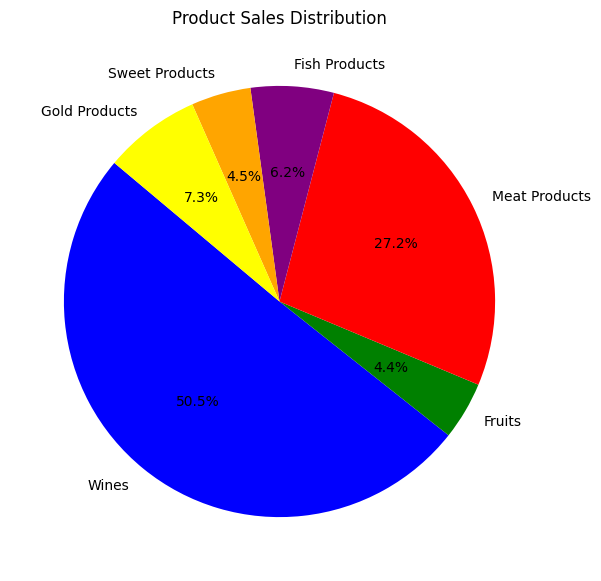

In [ ]:
# Labels and sizes for the pie chart from the dictionary
labels = product_sales.keys()
sizes = product_sales.values()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']  # Assign a color to each product

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Product Sales Distribution')
plt.show()

<Figure size 1400x800 with 0 Axes>

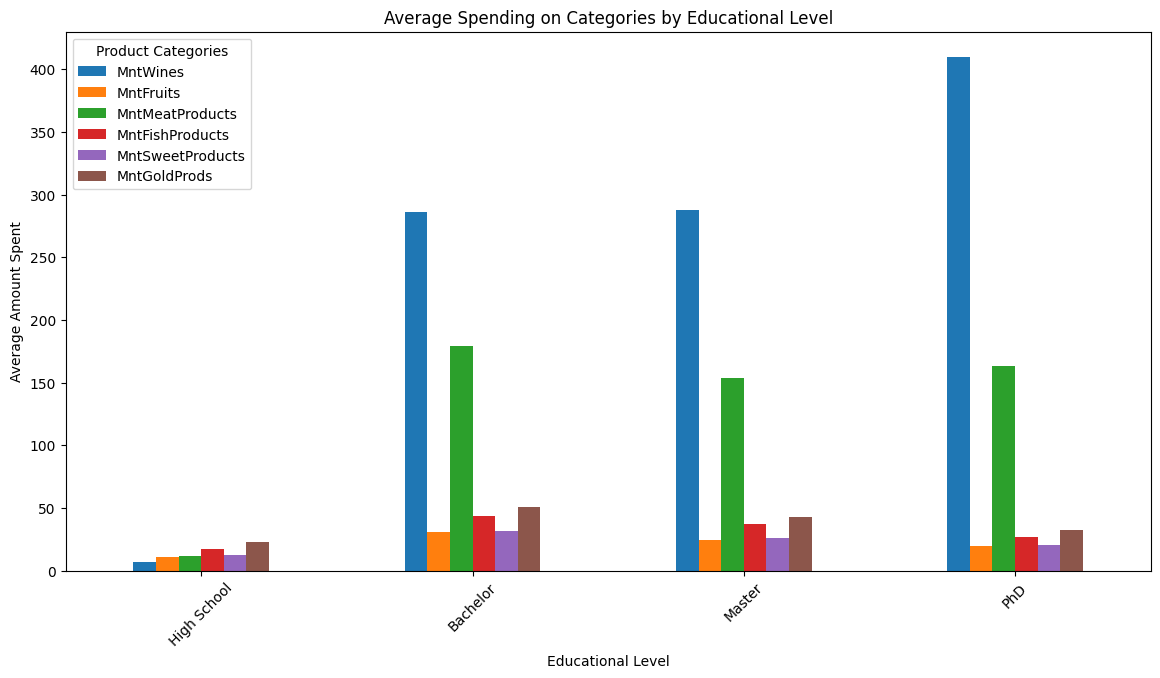

<Figure size 1400x800 with 0 Axes>

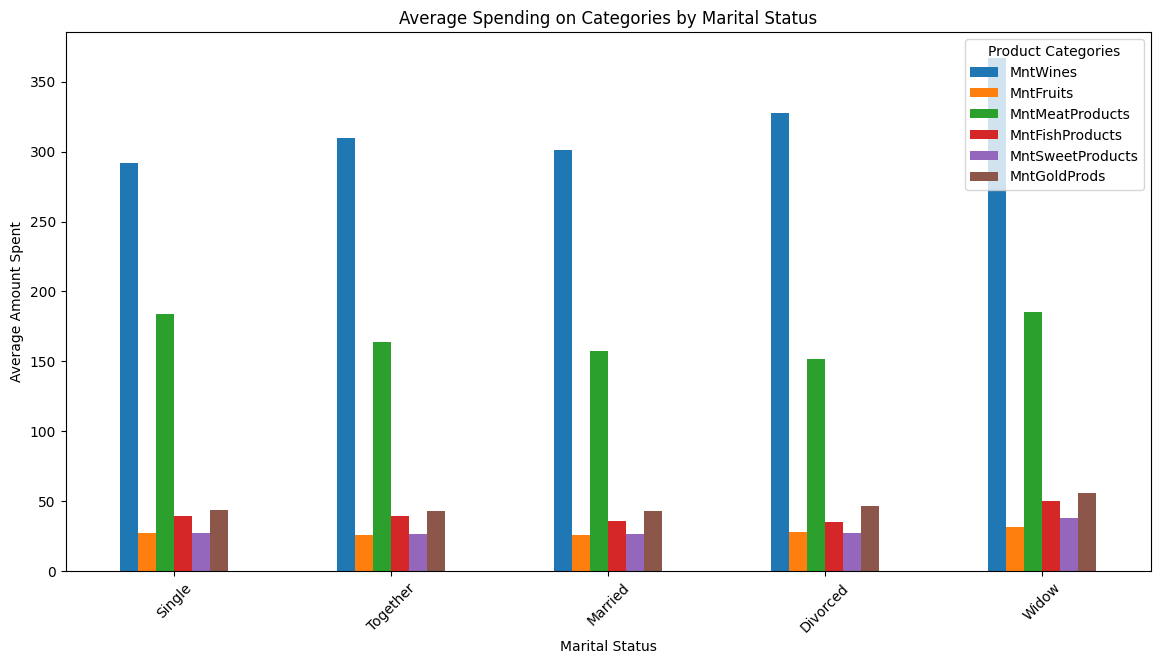

In [ ]:
df['Education'] = pd.Categorical(df['Education'], categories=education_order, ordered=True)
df['Marital_Status'] = pd.Categorical(df['Marital_Status'], categories=marital_order, ordered=True)

# Spending Categories
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting spending by Education
plt.figure(figsize=(14, 8))
df.groupby('Education')[spending_categories].mean().plot(kind='bar', figsize=(14, 7))
plt.title('Average Spending on Categories by Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Product Categories')
plt.show()

# Plotting spending by Marital Status
plt.figure(figsize=(14, 8))
df.groupby('Marital_Status')[spending_categories].mean().plot(kind='bar', figsize=(14, 7))
plt.title('Average Spending on Categories by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Product Categories')
plt.show()

### Analysing campaign data

In [ ]:
# Columns representing campaigns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

summary_data = {
    'Accepted': [df[camp].sum() for camp in campaigns],
    'Not Accepted': [df[camp].count() - df[camp].sum() for camp in campaigns]
}

# Create a DataFrame
campaign_summary = pd.DataFrame(summary_data, index=campaigns)

campaign_summary['Accepted %'] = (campaign_summary['Accepted'] / df.shape[0]) * 100
campaign_summary['Not Accepted %'] = (campaign_summary['Not Accepted'] / df.shape[0]) * 100

print('The following ')
campaign_summary

,Accepted,Not Accepted,Accepted %,Not Accepted %
AcceptedCmp1,142,2063,6.439909,93.560091
AcceptedCmp2,30,2175,1.360544,98.639456
AcceptedCmp3,163,2042,7.392290,92.607710
AcceptedCmp4,164,2041,7.437642,92.562358
AcceptedCmp5,161,2044,7.301587,92.698413


It is possible to analyse the overall acceptance rate of all the campaign promotions.
It is possible to afirm there was something wrong with the second campaign.
The following promotions seemed to pick up the numbers again and stabilize the acceptance rate.
It is important to understand what went wrong with the previous campaigns and make sure to learn from those mistakes so they do not happen again.


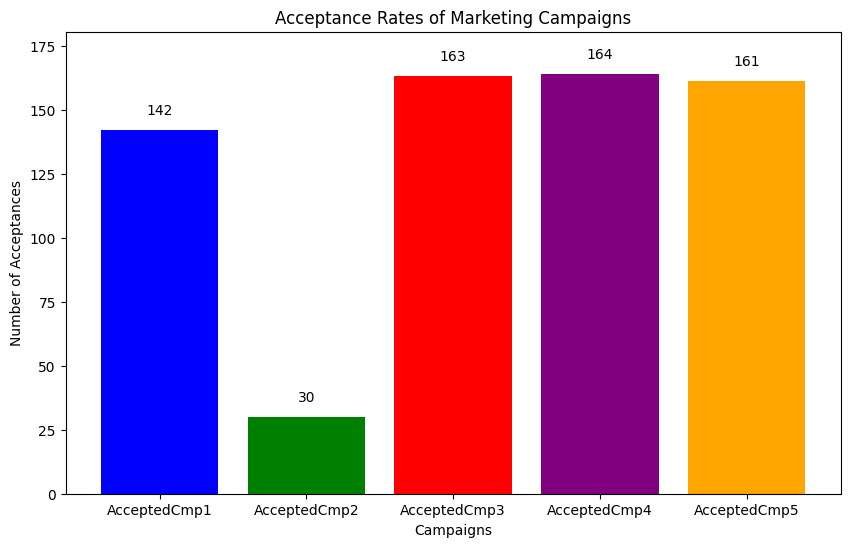

In [ ]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_counts = [df[campaign].sum() for campaign in campaigns]

plt.figure(figsize=(10, 6))
plt.bar(campaigns, acceptance_counts, color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Acceptance Rates of Marketing Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Number of Acceptances')
plt.ylim(0, max(acceptance_counts) * 1.1)  # Set y-axis limit to slightly above the highest count

for i, count in enumerate(acceptance_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')  # Annotate each bar with the count

print('It is possible to analyse the overall acceptance rate of all the campaign promotions.\nIt is possible to afirm there was something wrong with the second campaign.\nThe following promotions seemed to pick up the numbers again and stabilize the acceptance rate.\nIt is important to understand what went wrong with the previous campaigns and make sure to learn from those mistakes so they do not happen again.')
plt.show()

## 3.Data processing
This step consists of processing the data and includes the following:

* Properly scale quantitative values (Normalization/Standardization)
* Encoding categorical variables
* Re-check to see if everything was applied correctly

### Normalizing quantitative values

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Age', 'Income', 'Total expenses'] + list(df.filter(regex='AcceptedCmp').columns)]

# Initialize the MinMaxScaler
scaler = pp.MinMaxScaler()

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show the first few rows to verify normalization
print(df.head())

   Age Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0   57  Bachelor         Single  58138.0      0.0       0.0  2012-09-04   
1   60  Bachelor         Single  46344.0      0.5       0.5  2014-03-08   
2   49  Bachelor       Together  71613.0      0.0       0.0  2013-08-21   
3   30  Bachelor       Together  26646.0      0.5       0.0  2014-02-10   
4   33       PhD        Married  58293.0      0.5       0.0  2014-01-19   

    Recency  MntWines  MntFruits  ...  NumWebPurchases  NumCatalogPurchases  \
0  0.585859  0.425318   0.442211  ...         0.296296             0.357143   
1  0.383838  0.007368   0.005025  ...         0.037037             0.035714   
2  0.262626  0.285332   0.246231  ...         0.296296             0.071429   
3  0.262626  0.007368   0.020101  ...         0.074074             0.000000   
4  0.949495  0.115874   0.216080  ...         0.185185             0.107143   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0  

### Encode categorical values

In [ ]:
# Perform one-hot encoding for categorical columns
categorical_cols = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
print(df)

      Age Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0      57  Bachelor         Single  58138.0      0.0       0.0  2012-09-04   
1      60  Bachelor         Single  46344.0      0.5       0.5  2014-03-08   
2      49  Bachelor       Together  71613.0      0.0       0.0  2013-08-21   
3      30  Bachelor       Together  26646.0      0.5       0.0  2014-02-10   
4      33       PhD        Married  58293.0      0.5       0.0  2014-01-19   
...   ...       ...            ...      ...      ...       ...         ...   
2235   47  Bachelor        Married  61223.0      0.0       0.5  2013-06-13   
2236   68       PhD       Together  64014.0      1.0       0.5  2014-06-10   
2237   33  Bachelor       Divorced  56981.0      0.0       0.0  2014-01-25   
2238   58    Master       Together  69245.0      0.0       0.5  2014-01-24   
2239   60       PhD        Married  52869.0      0.5       0.5  2012-10-15   

       Recency  MntWines  MntFruits  ...  NumWebPurchases  \
0 

### Correlation heatmap

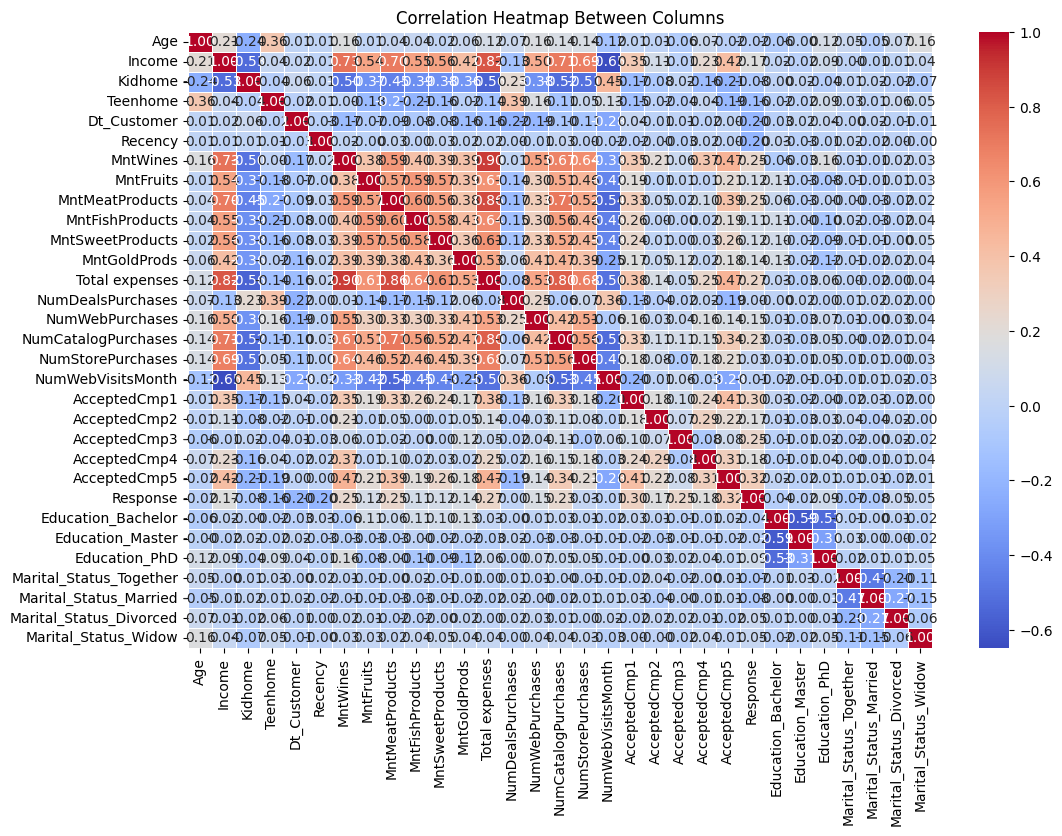

In [ ]:
corr_matrix = categorical_cols.corr()

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Columns')
plt.show()

The 2 columns with most distinct behaviours are the income and kidhome. This can be justified by the high expenses of having a child as well as the fact that parents must be more sober during child care. Which would not be the case for taking care of teenagers (as much as taking care of small kids).

It is also possible to observe that Wines and meat have the highest correlaiton to total expenses. That was observed before in the product sales distribution and proven at this correlation matrix.

Another insight about the income column is that the higher the income the less number of web visits in a month. This can be speculated to be that money is less of an issue so they are less likely to look up better prices and not care as much for price fluctuation.

##4. Conclusions

###This project allowed us to better understand this stores customerbase.

###Store product mix / brand positioning

The store focuses mainly on wine and wine associated products such as pairings for wines. This is estipulated because meat is highly consumed paired with red wines, fish with white wine. Fruits can also be paired with certain wines. Sweets can be generical consumption and gold to attend to more high end customers. The high meat sales can be related to a higher product sales of red wine. We do not have that classification regarding store products. It is recomended that the store starts to collect that data so they can improve their product mix and better attend customers needs. The customer age database also reflects that this store has an alcohol focused operations since the minimum age is 18 years.

###Education/Marital Statuses wine consumption

One of the more curious insights of this project was how marital status influenced the purchasing pattern of customers regarding to this stores products. Customers who had been divorced or widowed had higher rates of wine consumption, which could be related to some possible trauma regarding marital conflict. This would have to be further investigated in order to prove or disprove this theory. Another insight regarding wine purchase pattern is that customers with PhDs have a higher expense value with wine than other with only college and masters degrees. This could be explained by their higher pay or knowledge/interest in the wine niche. They could be classified as high wine connoisseur (a theory to be further analysed in future projects).

###Education/Enviroment/Income

It is possible to afirm that the store is located in a more developed area due to the high level of education of its customers (most with college dregrees and a considerate number with masters and PhDs). The income of customers seem to reflect the high level of education and better paying positions, however there is no actual data of where this operation took place. Because of that we do not have the actual currency of the country nor the average income of said place.

###Kids x teens households

It was possible to better analyse the behavior of customers with kids and teenagers versus the customers with no kids. Our initial hypothesis that teenage households would behave the same way as kids households were disproven. This could be regards the fact that parents save more money in relation to having kids, or that these parents would have to reduce wine consumption during their childs earlier ages. This pattern would be diminish as kids turn into teenagers, allowing parents to reraise their wine consumption.

###Marketing campaigns:

The different marketing campaigns had some dificulties to be accepted (the second campaign in special). This was overcome by the next campaigns (3, 4, 5). The datafile in question does not have more details on the marketing campign, but it would be important to look into how they were implemented so that future iniciatives don't suffer from the same mistakes. It is also possible to analyse the positive aspects of these previous endeavours to improve even more the next operations. The marketing campaign seems to be more accepted between those of higher education such as bachelor's, masters, ands Phds. This could reflect the perceived image of the brand of the store and be a great way to position the brand as a high quality wine authority in the market. One viable strategy to the store is to focus on families with kids who are close to growing into teenagers and families with teenages at home. This is because the spending patter will be most likely raising in the next years, and by doing that they might create a loyalty relationship with those customers before any competitors. One possible feature for the machine learning algorithms is to see if this theory would be validated via machine learning.

###Frequency of purchase

It was found that customers who buy from the store more frequently also tend to have higher total expenses. It would be viable to explore campaigns that incentivise more frequent purchases. Implementing points to those customers or creating more interactions with those clients could increase store revenue. *it is important to develop a robust plan on how to implement a campaign like this so that the store does not lose the image of authority figure.

##5.Future clustering and classification
- This would be an unsupervised machine learning project.